<a href="https://colab.research.google.com/github/HariCharan21903/Online-Payment-Fraud-Detection/blob/main/Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.utils import resample

In [2]:
data = pd.read_csv('new_file.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156156 entries, 0 to 156155
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            156156 non-null  int64  
 1   type            156156 non-null  object 
 2   amount          156156 non-null  float64
 3   nameOrig        156155 non-null  object 
 4   oldbalanceOrg   156155 non-null  float64
 5   newbalanceOrig  156155 non-null  float64
 6   nameDest        156155 non-null  object 
 7   oldbalanceDest  156155 non-null  float64
 8   newbalanceDest  156155 non-null  float64
 9   isFraud         156155 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 11.9+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,156156.000000,1.561560e+05,1.561550e+05,1.561550e+05,1.561550e+05,1.561550e+05,156155.000000
mean,9.408290,1.791151e+05,8.934680e+05,9.101466e+05,9.190986e+05,1.180973e+06,0.000852
std,1.930106,3.385216e+05,2.815021e+06,2.851979e+06,2.386459e+06,2.700191e+06,0.029172
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.000000,1.122081e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,10.000000,6.210529e+04,1.992300e+04,0.000000e+00,3.475700e+04,9.924067e+04,0.000000
75%,11.000000,2.237668e+05,1.959983e+05,2.268164e+05,6.974426e+05,1.124469e+06,0.000000
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000


In [5]:
data = data.iloc[:,:-1]

In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

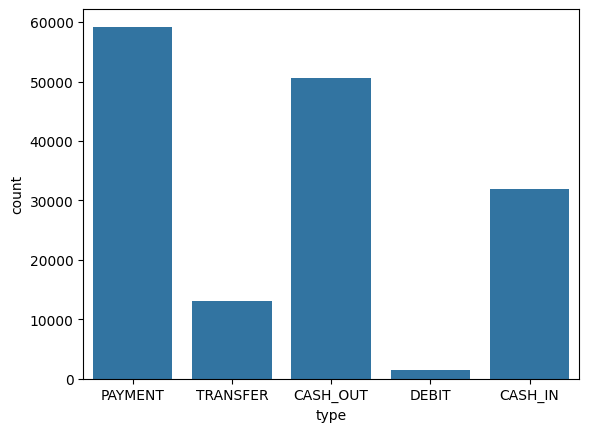

In [7]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

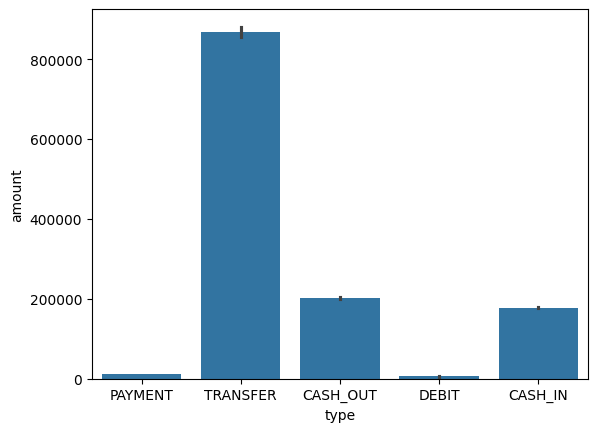

In [8]:
sns.barplot(x='type', y='amount', data=data)

<ipython-input-12-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

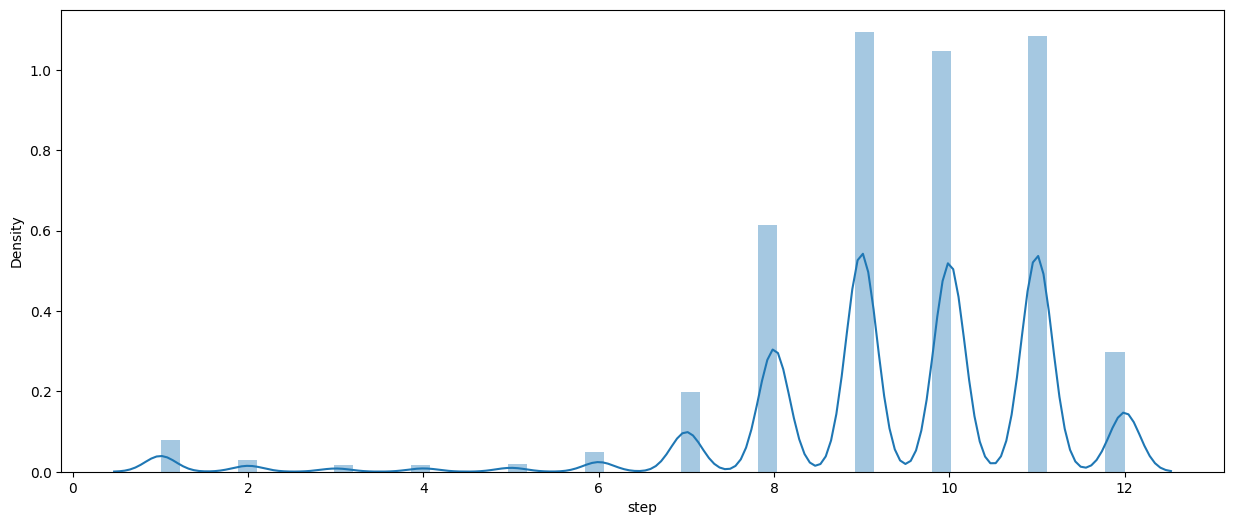

In [12]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

<Axes: >

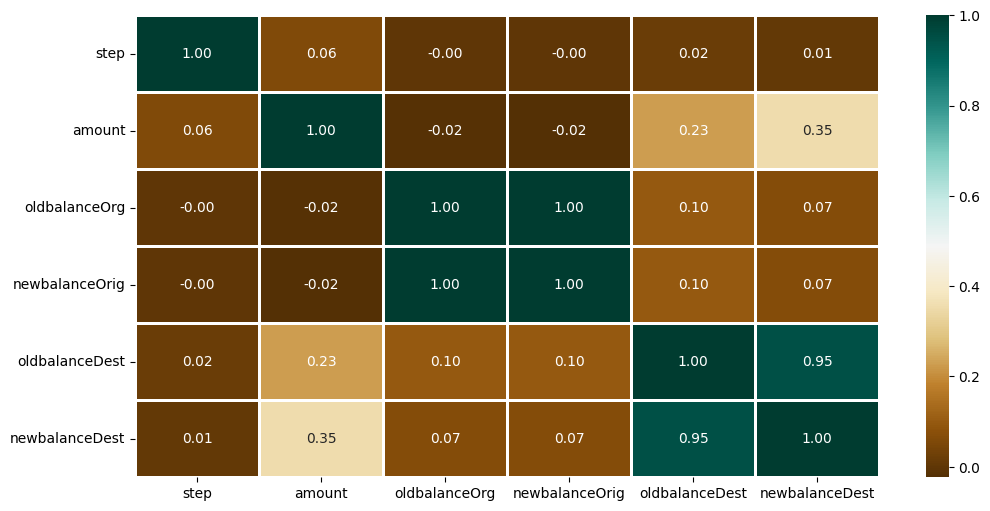

In [13]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [14]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False,True,False


In [18]:
# Load the original dataframe again
data = pd.read_csv('new_file.csv')

# Create dummies and merge
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)

# Now, isFraud should be present
X = data_new.drop(['type', 'nameOrig', 'nameDest', 'isFraud'], axis=1)
y = data_new['isFraud']

In [19]:
X.shape, y.shape

((6362620, 10), (6362620,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [5]:

# %%
X.shape, y.shape
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# %%
models = [LogisticRegression(),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.8946290277620094
Validation Accuracy :  0.8923641053077078

RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  0.9999992716004644
Validation Accuracy :  0.9650098729693373



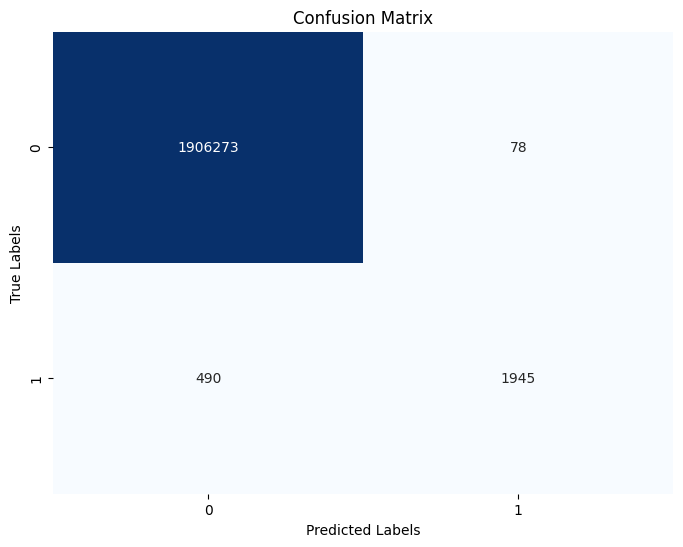

In [6]:
y_pred = models[1].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [7]:
recall = recall_score(y_test, y_pred)
recall


0.7987679671457906

In [8]:
f1 = f1_score(y_test, y_pred)
f1

0.8725886047554957

In [9]:
roc_auc = ras(y_test, y_pred)
roc_auc

0.8993635256404369

In [10]:
con_data = pd.concat([X, y], axis=1)
non_fraud = con_data[con_data['isFraud'] == 0]
fraud = con_data[con_data['isFraud'] == 1]

num_samples = min(len(non_fraud), len(fraud))
non_fraud_undersampled = resample(non_fraud, replace=False,
                                  n_samples=num_samples, random_state=42)

balanced_df = pd.concat([non_fraud_undersampled, fraud])

balanced_df = balanced_df.sample(frac=1, random_state=42)

In [11]:
balanced_df['isFraud'].value_counts()

,count
isFraud,
1,8213
0,8213


In [12]:
X = balanced_df.drop(['isFraud'], axis=1)
y = balanced_df['isFraud']

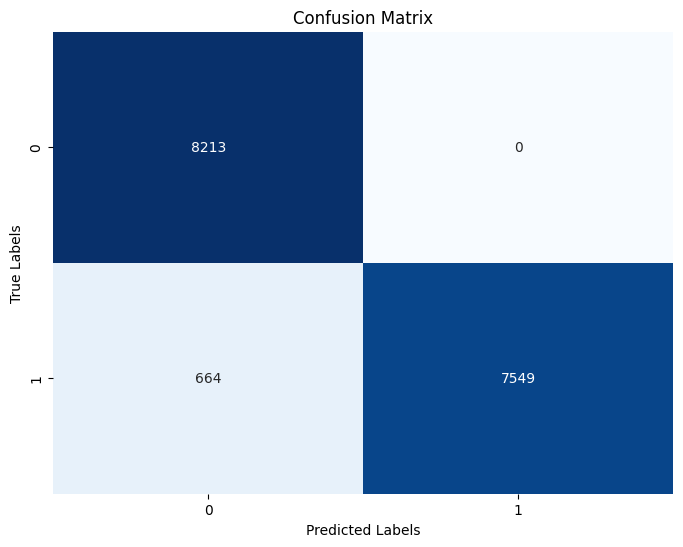

In [13]:
y_pred = models[1].predict(X)

cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = ras(y, y_pred)
print(f'Recall: {recall}\nf1 score: {f1}\nRoc_auc: {roc_auc}')

Recall: 0.9191525630098624
f1 score: 0.9578733663240705
Roc_auc: 0.9595762815049311
